# ARMA models: ARIMA, SARIMA, SARIMAX

### Notes

* The ARMA model family comprises several varieties: 
    * ARMA: Autoregressive Moving Average
    * ARIMA: Autoregressive Integrated Moving Average ( = ARMA + trends)
    * SARIMA: Seasonal Autoregressive Integrated Moving Average
    * SARIMAX: Seasonal Autoregressive Moving Average with Exogenous variables (=features)

* ARMA, ARIMA, and SARIMA are univariate models, whereas SARIMAX is a multivariate model which requires forecasted features as inputs for forecasting.
* The number of periods per season is limited in SARIMA and SARIMAX models. They can capture weekly seasonality with daily data (7 periods per season) or yearly seasonality with monthly data (12 periods per season), but they could not, for instance, capture yearly seasonality using daily data (365 periods per season). Yearly seasonality with monthly data (52 periods per season) is usually borderline. 


### References

* https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

import forecasttk.visualize as viz
from forecasttk.evaluate import eval_model 

plt.style.use("seaborn-whitegrid")

## Load and prepare data

In [2]:
# Load data
df = pd.read_csv("data/catalog_seasfac.csv",
                 usecols=["date", "men", "women", "jewel", "mail", "page", "phone", "print", "service"],
                 index_col = "date")

# Convert index to PeriodIndex
df.index = pd.to_datetime(df.index).to_period("M")

# Define features and target
y = df["women"]
X = df[["mail", "page", "phone", "print", "service"]]

# Show features and target
X.join(y).head()

,mail,page,phone,print,service,women
date,,,,,,
1989-01,7978,73,34,22294.48,20,16578.93
1989-02,8290,88,29,27426.47,20,18236.13
1989-03,8029,65,24,27978.66,26,43393.55
1989-04,7752,85,20,28949.65,22,30908.49
1989-05,8685,74,17,22642.27,21,28701.58


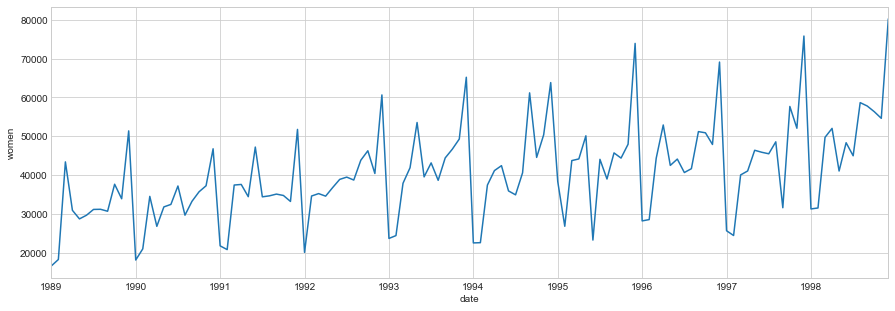

In [4]:
# Visualize target
viz.plot_series(y, xlabel=y.index.name, ylabel=y.name)

## Train/test split

In [5]:
X_train = X[:"1997"]
y_train = y[:"1997"]
X_test = X["1998"]
y_test = y["1998"]

## ARIMA model

#### ARIMA(2,2,2):
* 2 autoregressive terms, 2 times integrated, 2 moving average terms

In [6]:
# Instantiate and train model
model = SARIMAX(y_train, exog=None, order=(2,2,2))
model = model.fit(maxiter=100)

# Model statistics
model.summary()

C:\Users\csa\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  women   No. Observations:                  108
Model:               SARIMAX(2, 2, 2)   Log Likelihood               -1142.243
Date:                Tue, 07 Jan 2020   AIC                           2294.485
Time:                        13:02:34   BIC                           2307.803
Sample:                    01-31-1989   HQIC                          2299.883
                         - 12-31-1997                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1548      0.107      1.446      0.148      -0.055       0.365
ar.L2         -0.0731      0.128     -0.570      0.569      -0.324       0.178
ma.L1         -1.9968      0.142    -14.049      0.000      -2.275      -1.718
ma.L2          0.9975      0.145      6.876      0.000       0.713       1.282
sigma2      1.193e+08   1.98e-09   6.03e+16      0.000    1.19e+08    1.19e+08
===================================================================================
Ljung-Box (Q):                      150.14   Jarque-Bera (JB):                 4.00
Prob(Q):                              0.00   Prob(JB):                         0.14
Heteroskedasticity (H):               1.48   Skew:                             0.21
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.03e+32. Standard errors may be unstable.
"""

>> TRAINING DATA
Mean of true values:          39477.2528
Mean of predicted values:     43035.5016
Mean absolute error:          8697.7873
Mean relative error:          0.2203
Root mean squared error:      11629.4721
Coefficient of determination: -0.0097
>> TEST DATA
Mean of true values:          50541.5242
Mean of predicted values:     51390.8183
Mean absolute error:          9163.9122
Mean relative error:          0.1813
Root mean squared error:      12557.1796
Coefficient of determination: 0.0112


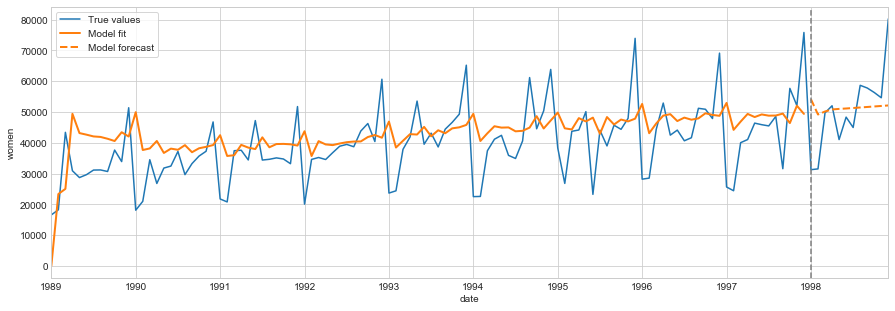

In [7]:
# Predict and forecast
y_pred = model.predict()
y_fcst = model.forecast(12)

# Evaluate model on training set
print(">> TRAINING DATA")
eval_model(y_train, y_pred)

# Evaluate model on test set
print(">> TEST DATA")
eval_model(y_test, y_fcst)

# Visualize fit and forecast
viz.plot_model(y, y_pred, y_fcst, xlabel=y.index.name, ylabel=y.name)

## SARIMA model

#### SARIMA(1,1,1)(2,1,1)12:
* 1 autoregressive term, 1 times integrated, 1 moving average term 
* 2 seasonal autoregressive terms, 1 times seasonally integrated, 1 seasonal moving average term
* 12 periods per season (12 months per year)

In [8]:
# Instantiate and train model
model = SARIMAX(y_train, exog=None, order=(1,1,1), seasonal_order=(2,1,1,12))
model = model.fit(maxiter=100)

# Model statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              women   No. Observations:                  108
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -981.313
Date:                            Tue, 07 Jan 2020   AIC                           1974.627
Time:                                    13:02:55   BIC                           1989.950
Sample:                                01-31-1989   HQIC                          1980.819
                                     - 12-31-1997                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0287      0.155      0.186      0.853      -0.275       0.332
ma.L1         -0.6418      0.159     -4.046      0.000      -0.953      -0.331
ar.S.L12       0.0353      0.748      0.047      0.962      -1.431       1.501
ar.S.L24       0.1569      0.374      0.419      0.675      -0.577       0.890
ma.S.L12      -0.5364      0.725     -0.739      0.460      -1.958       0.885
sigma2       6.24e+07   5.46e-08   1.14e+15      0.000    6.24e+07    6.24e+07
===================================================================================
Ljung-Box (Q):                       40.91   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.43   Prob(JB):                         0.48
Heteroskedasticity (H):               1.34   Skew:                            -0.11
Prob(H) (two-sided):                  0.41   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.2e+30. Standard errors may be unstable.
"""

>> TRAINING DATA
Mean of true values:          39477.2528
Mean of predicted values:     39764.7748
Mean absolute error:          6126.4128
Mean relative error:          0.1552
Root mean squared error:      8598.7117
Coefficient of determination: 0.4480
>> TEST DATA
Mean of true values:          50541.5242
Mean of predicted values:     48267.2336
Mean absolute error:          4019.5251
Mean relative error:          0.0795
Root mean squared error:      5605.6235
Coefficient of determination: 0.8030


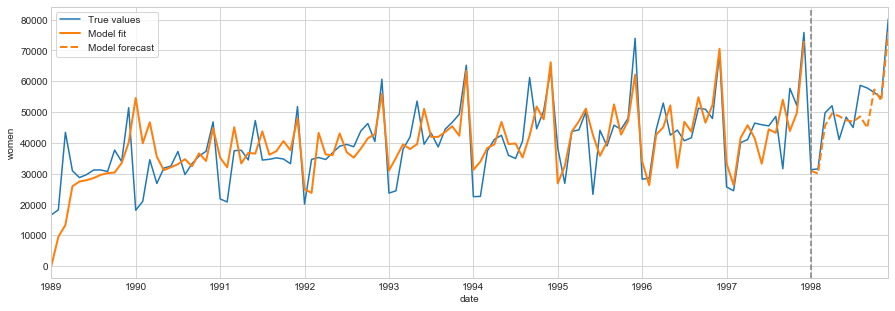

In [9]:
# Predict and forecast
y_pred = model.predict()
y_fcst = model.forecast(12)

# Evaluate model on training set
print(">> TRAINING DATA")
eval_model(y_train, y_pred)

# Evaluate model on test set
print(">> TEST DATA")
eval_model(y_test, y_fcst)

# Visualize fit and forecast
viz.plot_model(y, y_pred, y_fcst, xlabel=y.index.name, ylabel=y.name)

## SARIMAX model

#### SARIMAX(1,1,1)(2,1,1)12:
* 1 autoregressive term, 1 times integrated, 1 moving average term 
* 2 seasonal autoregressive terms, 1 times seasonally integrated, 1 seasonal moving average term
* 12 periods per season (12 months per year)
* Vector of exogenous features X

In [10]:
# Instantiate and train model
model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(2,1,1,12))
model = model.fit(maxiter=100)

# Model statistics
model.summary()

C:\Users\csa\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              women   No. Observations:                  108
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -944.244
Date:                            Tue, 07 Jan 2020   AIC                           1910.489
Time:                                    13:03:13   BIC                           1938.581
Sample:                                01-31-1989   HQIC                          1921.840
                                     - 12-31-1997                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
mail           1.9833      1.128      1.758      0.079      -0.228       4.195
page         -22.6955    106.661     -0.213      0.831    -231.747     186.356
phone          1.3416    159.159      0.008      0.993    -310.604     313.287
print          0.4466      0.269      1.662      0.097      -0.080       0.973
service      359.8370    194.860      1.847      0.065     -22.081     741.755
ar.L1          0.0029      0.379      0.008      0.994      -0.739       0.745
ma.L1         -0.9725      0.157     -6.183      0.000      -1.281      -0.664
ar.S.L12      -0.1505      0.794     -0.190      0.850      -1.706       1.405
ar.S.L24      -0.0620      0.548     -0.113      0.910      -1.136       1.012
ma.S.L12      -0.4681      0.800     -0.585      0.559      -2.036       1.100
sigma2      3.543e+07      0.002   2.15e+10      0.000    3.54e+07    3.54e+07
===================================================================================
Ljung-Box (Q):                       40.33   Jarque-Bera (JB):               194.11
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               2.76   Skew:                            -0.61
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.03e+26. Standard errors may be unstable.
"""

>> TRAINING DATA
Mean of true values:          39477.2528
Mean of predicted values:     38946.5231
Mean absolute error:          3358.9025
Mean relative error:          0.0851
Root mean squared error:      5182.1551
Coefficient of determination: 0.7995
>> TEST DATA
Mean of true values:          50541.5242
Mean of predicted values:     49359.2518
Mean absolute error:          2688.9947
Mean relative error:          0.0532
Root mean squared error:      4215.3520
Coefficient of determination: 0.8886


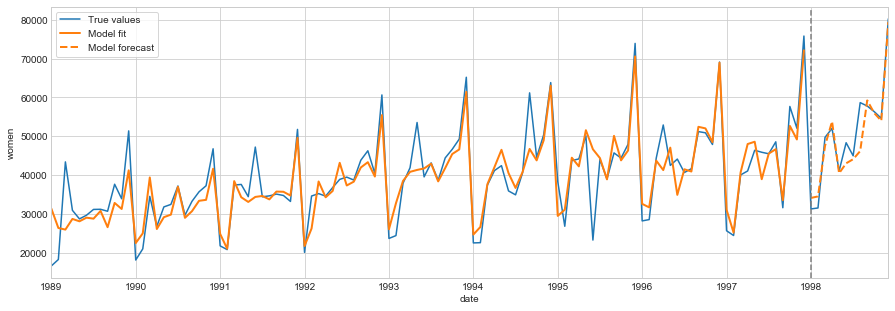

In [11]:
# Predict
y_pred = model.predict()

# "Forecast" features: Using test data here for the sake of simplicity
# In a real application features would have to be forecasted first!
X_fcst = X_test

# Forecast target
y_fcst = model.forecast(steps=12, exog=X_fcst)

# Evaluate model on training set
print(">> TRAINING DATA")
eval_model(y_train, y_pred)

# Evaluate model on test set
print(">> TEST DATA")
eval_model(y_test, y_fcst)

# Visualize fit and forecast
viz.plot_model(y, y_pred, y_fcst, xlabel=y.index.name, ylabel=y.name)

C:\Users\csa\Documents\Data Science\Projects\forecasting-toolkit-github\forecasttk\visualize.py:152: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


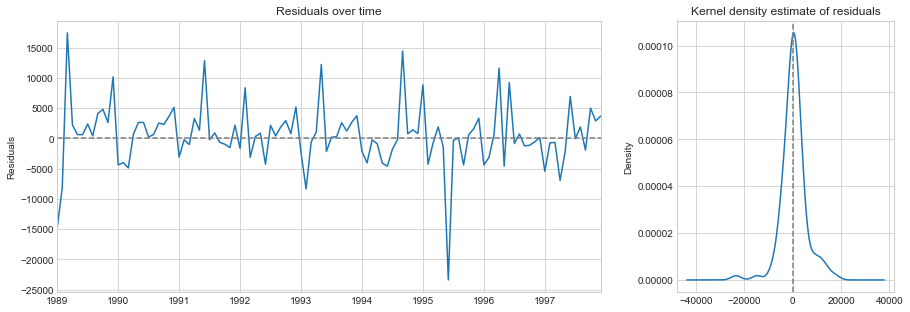

In [12]:
# Plot residuals
viz.plot_residuals(y_train-y_pred)